<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/TB_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries  

import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd  

In [35]:
#Importing the data

dataset= pd.read_csv('nilai_to.csv')  
X = dataset.iloc[:, [18,19]].values
y = dataset.iloc[:, 19].values

dataset.head()

,Ranking,Nis,Nama,Sekolah,Nama PTN,Jurusan,PG,Penalaran Umum,Pemahaman bacaan & menulis,Pengetahuan Umum,Pengetahuan Kuantitatif,Inggris,Ekonomi,Sosiologi,Sejarah,Geografi,Nilai TPS,Nilai TKS,Skor UTBK,Status Ke1an
0,1,20307332037,Rizqi Zuhdi Amarta,SMAN 1 PADANG,UNIVERSITAS GAJAH MADA,BANGUNAN SOSIAL DAN KESEJAHTERAAN,653.11,476,476,598,658,672,621,622,559,642,622.76,610.85,617.47,0
1,2,20307331061,Resti Natalia Chaniago,SMAN 5 PADANG,UNIVERSITAS GADJAH MADA,SEJARAH,484.58,525,525,595,595,574,560,560,560,595,568.75,569.80,569.28,1
2,3,20307331062,Indah Widia Sari,SMAN 5 PADANG,UNIVERSITAS INDONESIA,SASTRA INGGRIS,481.70,525,525,560,560,560,560,525,595,560,560.00,560.00,560.00,1
3,4,20307332049,Mulyadi,MAN 2 PADANG,UNIVERSITAS INDONESIA,SASTRA INDONESIA,465.99,525,525,560,525,543,560,525,560,525,542.50,542.50,542.50,1
4,5,20307331058,Elfaiza Warsya,SMA DONBOSCO,UNIVERSITAS INDONESIA,ILMU ADMINISTRASI NEGARA,485.77,560,560,490,560,546,525,595,490,490,551.25,529.20,540.23,1


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [37]:
print(X_train)

[[445.9    0.  ]
 [540.23   1.  ]
 [226.52   0.  ]
 [409.68   0.  ]
 [560.     1.  ]
 [448.53   0.  ]
 [522.73   1.  ]
 [542.5    1.  ]
 [353.26   0.  ]
 [443.45   0.  ]
 [523.08   1.  ]
 [448.     0.  ]
 [418.43   0.  ]
 [390.25   0.  ]
 [315.7    0.  ]
 [472.5    0.  ]
 [517.65   1.  ]
 [166.53   0.  ]
 [498.93   1.  ]
 [483.     1.  ]
 [392.89   0.  ]
 [465.85   0.  ]
 [502.43   1.  ]
 [617.47   0.  ]
 [515.73   1.  ]
 [533.93   1.  ]
 [513.07   1.  ]
 [497.     1.  ]
 [224.99   0.  ]
 [523.43   1.  ]
 [518.56   0.  ]
 [485.     0.  ]
 [461.13   0.  ]
 [507.98   0.  ]
 [308.88   0.  ]
 [430.85   0.  ]
 [240.56   0.  ]
 [457.63   0.  ]
 [458.85   0.  ]
 [569.28   1.  ]
 [314.13   0.  ]
 [520.28   1.  ]
 [303.89   0.  ]
 [489.65   1.  ]
 [530.43   1.  ]
 [490.35   1.  ]
 [461.81   0.  ]
 [495.43   1.  ]
 [523.08   1.  ]
 [185.79   0.  ]
 [214.9    0.  ]
 [231.03   0.  ]
 [421.55   0.  ]
 [445.38   0.  ]]


In [38]:
print(y_train)

[0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0]


In [39]:
print(X_test)

[[483.23   0.  ]
 [483.     0.  ]
 [419.13   0.  ]
 [490.35   1.  ]
 [476.7    0.  ]
 [408.98   0.  ]
 [524.3    1.  ]
 [309.75   0.  ]
 [466.2    0.  ]
 [113.01   0.  ]
 [334.66   0.  ]
 [483.     1.  ]
 [475.65   1.  ]
 [446.43   0.  ]
 [469.7    0.  ]
 [352.45   0.  ]
 [163.92   0.  ]
 [288.95   0.  ]]


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
print(X_train)

[[ 0.08520232 -0.79772404]
 [ 0.95578984  1.25356634]
 [-1.93949279 -0.79772404]
 [-0.24907818 -0.79772404]
 [ 1.13825051  1.25356634]
 [ 0.10947504 -0.79772404]
 [ 0.79427938  1.25356634]
 [ 0.97674005  1.25356634]
 [-0.7697879  -0.79772404]
 [ 0.06259086 -0.79772404]
 [ 0.79750959  1.25356634]
 [ 0.10458358 -0.79772404]
 [-0.16832295 -0.79772404]
 [-0.42840094 -0.79772404]
 [-1.11643549 -0.79772404]
 [ 0.33069822 -0.79772404]
 [ 0.7473952   1.25356634]
 [-2.49315064 -0.79772404]
 [ 0.57462516  1.25356634]
 [ 0.42760449  1.25356634]
 [-0.40403593 -0.79772404]
 [ 0.26932424 -0.79772404]
 [ 0.60692725  1.25356634]
 [ 1.66865086 -0.79772404]
 [ 0.7296752   1.25356634]
 [ 0.89764608  1.25356634]
 [ 0.70512561  1.25356634]
 [ 0.55681286  1.25356634]
 [-1.95361342 -0.79772404]
 [ 0.8007398   1.25356634]
 [ 0.75579375 -0.79772404]
 [ 0.44606283 -0.79772404]
 [ 0.22576257 -0.79772404]
 [ 0.65814914 -0.79772404]
 [-1.17937842 -0.79772404]
 [-0.05369667 -0.79772404]
 [-1.80991526 -0.79772404]
 

In [42]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])
    neighbors=[]
    for i in range(self.k):
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [43]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = classifier.predict(X_test)

In [47]:
predictions=model.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0]
 [ 0  4]]


1.0

In [49]:
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[14  0]
 [ 0  4]]


1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


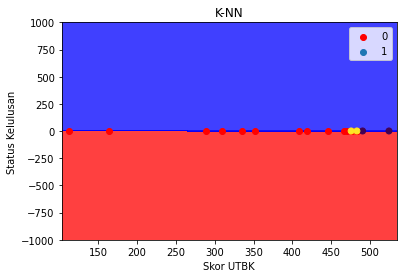

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN')
plt.xlabel('Skor UTBK')
plt.ylabel('Status Kelulusan')
plt.legend()
plt.show()